In [1]:
import sys

sys.path.append('app/trailsapp')

import importlib
import analyze

/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:195: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  summary['modes_string'] = ",".join([ "%.5lg"%m['time_fraction_pc'] for n, m in sorted(summary['modes'].items(), key=lambda x:x[1]['order']) if n is not "all"])
/home/savchenk/personal/strava-trail-analyze/app/trailsapp/analyze.py:414: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  activity['analysis']['modes_string'] = ",".join([ "%.5lg"%m['time_fraction_pc'] for n, m in sorted(activity['analysis']['modes'].items(), key=lambda x:x[1]['order']) if n is not "all"])


In [30]:
import gpxpy

# gpx = gpxpy.parse(open("data/1340065/COURSE_257330860.gpx").read())
gpx = gpxpy.parse(open("/home/savchenk/activity_14612787273.gpx").read())

In [29]:
gpx.

TimeBounds(start_time=datetime.datetime(2024, 3, 30, 21, 2, 45, tzinfo=SimpleTZ('Z')), end_time=datetime.datetime(2024, 3, 30, 21, 9, 34, 406000, tzinfo=SimpleTZ('Z')))

found step 0.19995
found step 2.69659
total time 0.6436111111111111 hr


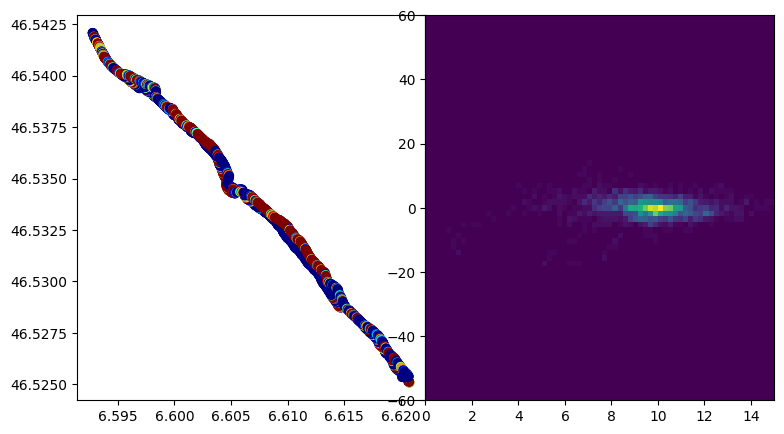

In [22]:
importlib.reload(analyze)
# analyze.produce_lut(gpx)
lut = analyze.produce_merged_lut([gpx])

None run trail
plotting
total distance 6.25 km
cumulative elevation gain -5.10 m
total elevation gain 91.60 m
total time 1.21
run flat    99.4% time 1.21 hr 6.22 km -6.30 
walk up      0.5% time 0.01 hr 0.02 km 2.20 
steep up     0.1% time 0.00 hr 0.01 km 0.00 
down steep   0.0% time 0.00 hr 0.00 km 0.00 
all        100.0% time 1.21 hr 6.25 km -4.10 


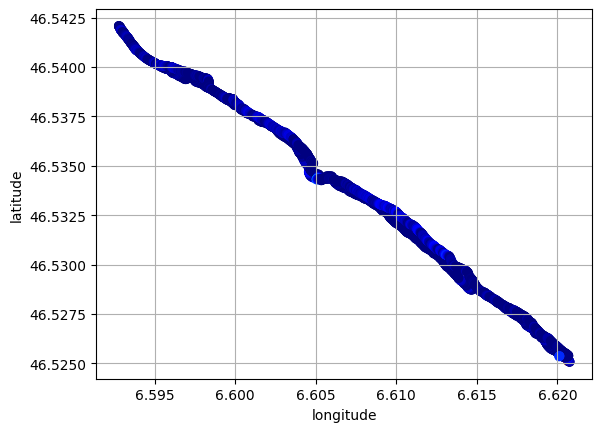

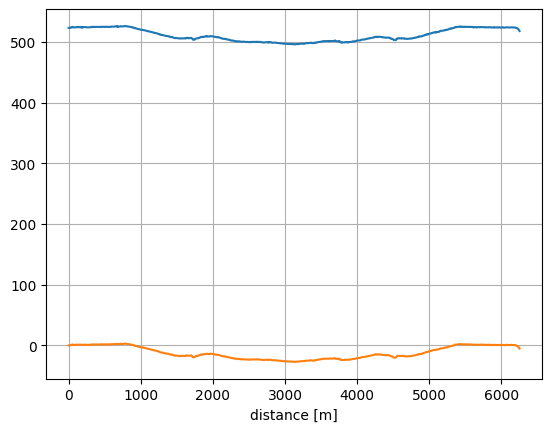

In [10]:
importlib.reload(analyze)

_ = analyze.analyze_route(dict(
    route_points=gpx.tracks[0].segments[0].points,
    route_gpx=gpx,
    type='run',
    sub_type='trail',
),
    plot=True,
    # lut_merged=lut,
)

5.4084577956604205
9.666176698127805


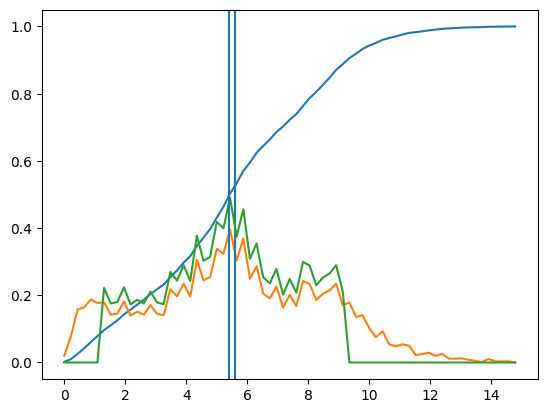

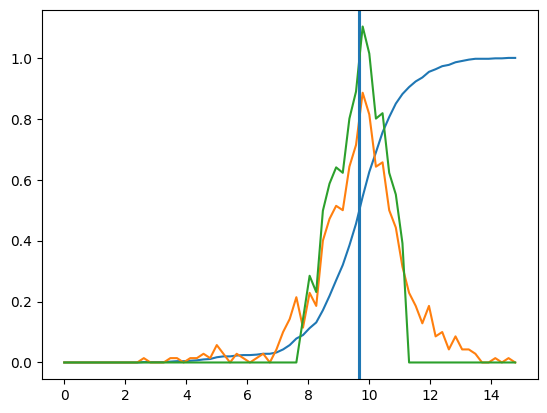

In [17]:
import numpy as np

print(analyze.speed_estim_for_grade(0, np.load(open("lut_merged.npy", "rb"), allow_pickle=True), plot=True))

print(analyze.speed_estim_for_grade(0, lut, plot=True))

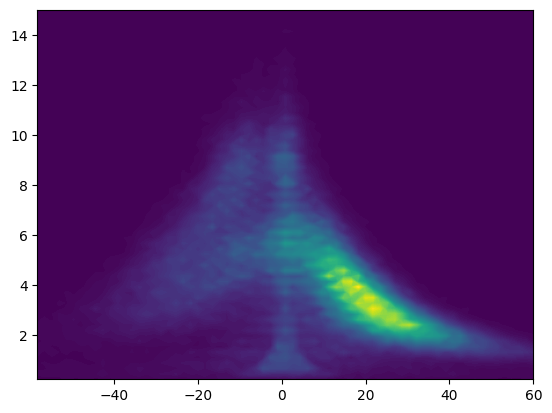

In [7]:
import matplotlib.pyplot as plt

plt.contourf(lut[2][1:], lut[1][1:], lut[0], levels=100)